# Lithuanian Political Party Programme Analysis (2024 Parliamentary Elections)

### Importing Libraries





In [2]:
!pip install wordcloud matplotlib

In [3]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

### Functions

In [118]:
# Function to read text from a file
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Function to remove filler words
def remove_filler_words(text, filler_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in filler_words]
    return " ".join(filtered_words)

# Function to generate a word cloud with filler words removed
def generate_word_cloud(text, filler_words, min_word_length=3):
    # Remove filler words
    filtered_text = remove_filler_words(text, filler_words)
    
    # Filter out small words
    words = [word for word in filtered_text.split() if len(word) >= min_word_length]
    filtered_text = " ".join(words)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.show()

# Function to return a DataFrame with word counts
def word_count_to_dataframe(text, filler_words, min_word_length=3):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove filler words
    filtered_text = remove_filler_words(text, filler_words)
    
    # Remove punctuation and split the text into words
    filtered_text = re.sub(r'[^\w\s]', '', filtered_text)  # Remove punctuation
    words = [word for word in filtered_text.split() if len(word) >= min_word_length]
    
    # Count the words
    word_counts = Counter(words)
    
    # Create a Pandas DataFrame
    df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

    # Reset index start at 1
    df = df.reset_index(drop=True)
    df.index += 1

    return df

In [119]:
# List of common Lithuanian filler words (add more as needed)
filler_words_lt = ["pat", "bei", "per", "nuo","ir", "tai", "kad", "bet", "nes", "tai", "kur", "kai", "už", "tik", "todėl", 
                   "taip", "arba", "kaip", "labai", "jis", "ji", "kurios", "tam", "yra", "proc.", "turi", "dėl", "būtų", "būna",
                   "būti", "proc"]

### Exploratory Data Analysis



#### Nemuno Ausra

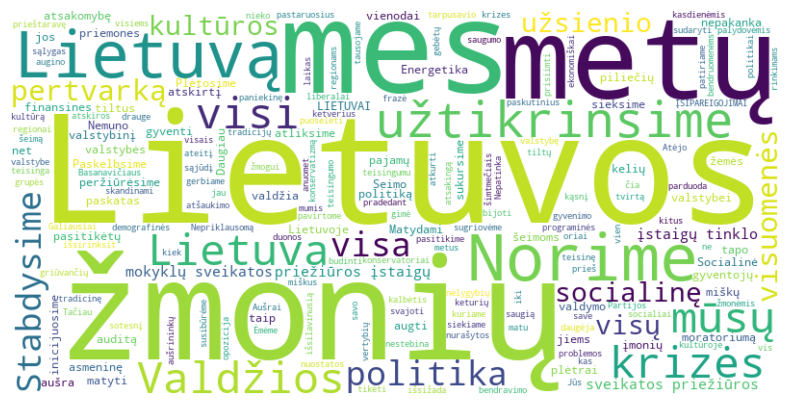

,Word,Count
1,lietuvos,7
2,žmonių,6
3,sveikatos,5
4,mes,5
5,metų,4
6,užtikrinsime,4
7,norime,4
8,lietuvą,4
9,mokyklų,3
10,lietuva,3


In [120]:
NM_path = "nemuno_ausra.txt"
NM_text = read_text_file(NM_path)
generate_word_cloud(NM_text, filler_words_lt)
NM_df = word_count_to_dataframe(NM_text, filler_words_lt)
NM_df.head(10)

#### TS-LKD

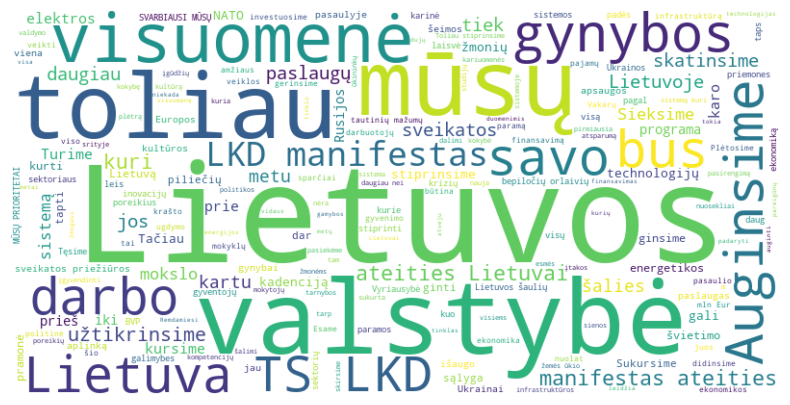

,Word,Count
1,lietuvos,90
2,mūsų,49
3,valstybės,41
4,toliau,38
5,darbo,36
6,gynybos,32
7,ateities,31
8,sveikatos,31
9,lietuvai,28
10,daugiau,27


In [121]:
TS_path = "ts_lkd.txt"
TS_text = read_text_file(TS_path)
generate_word_cloud(TS_text, filler_words_lt)
TS_df = word_count_to_dataframe(TS_text, filler_words_lt)
TS_df.head(10)

#### LSDP

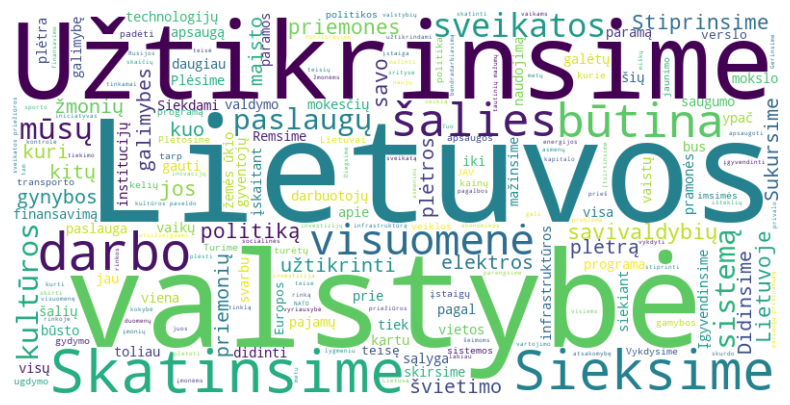

,Word,Count
1,lietuvos,101
2,darbo,68
3,valstybės,66
4,užtikrinsime,61
5,sieksime,59
6,skatinsime,59
7,sveikatos,54
8,būtina,52
9,paslaugų,52
10,šalies,44


In [122]:
LSDP_path = "lsdp.txt"
LSDP_text = read_text_file(LSDP_path)
generate_word_cloud(LSDP_text, filler_words_lt)
LSDP_df = word_count_to_dataframe(LSDP_text, filler_words_lt)
LSDP_df.head(10)

#### Vardan Lietuvos

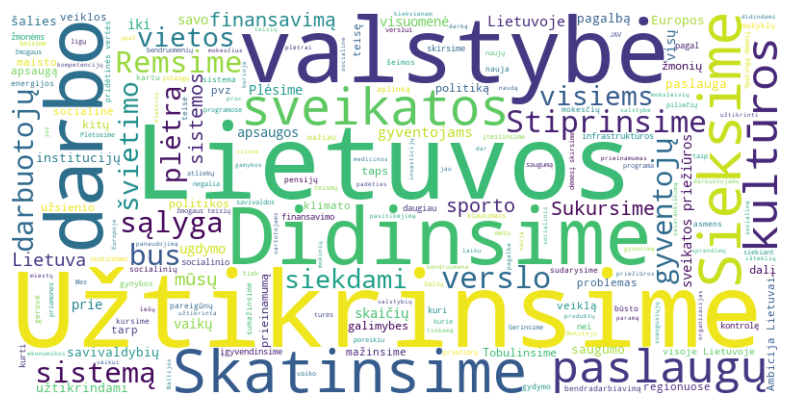

,Word,Count
1,užtikrinsime,55
2,lietuvos,54
3,valstybės,37
4,darbo,37
5,sveikatos,33
6,skatinsime,31
7,didinsime,30
8,sieksime,27
9,lietuvoje,22
10,kultūros,21


In [123]:
VARDAN_path = "vardan.txt"
VARDAN_text = read_text_file(VARDAN_path)
generate_word_cloud(VARDAN_text, filler_words_lt)
VARDAN_df = word_count_to_dataframe(VARDAN_text, filler_words_lt)
VARDAN_df.head(10)

#### Liberalų Sąjūdis

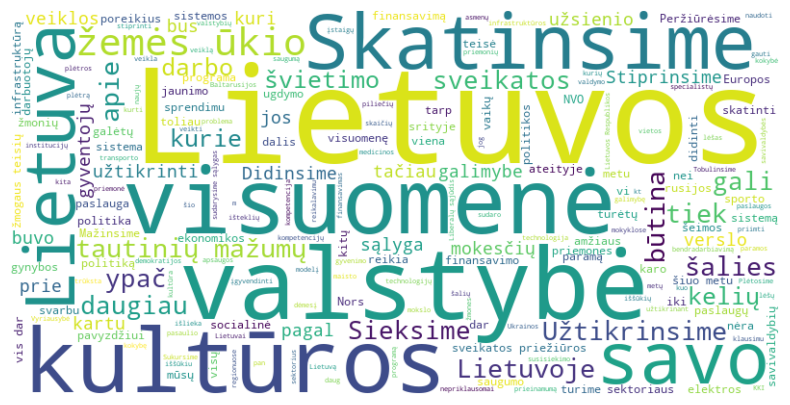

,Word,Count
1,lietuvos,185
2,žemės,95
3,sveikatos,94
4,darbo,93
5,valstybės,89
6,kultūros,76
7,paslaugų,73
8,skatinsime,65
9,vis,64
10,daugiau,63


In [124]:
LIB_path = "lib_sajudis.txt"
LIB_text = read_text_file(LIB_path)
generate_word_cloud(LIB_text, filler_words_lt)
LIB_df = word_count_to_dataframe(LIB_text, filler_words_lt)
LIB_df.head(10)

#### Laisvės partija



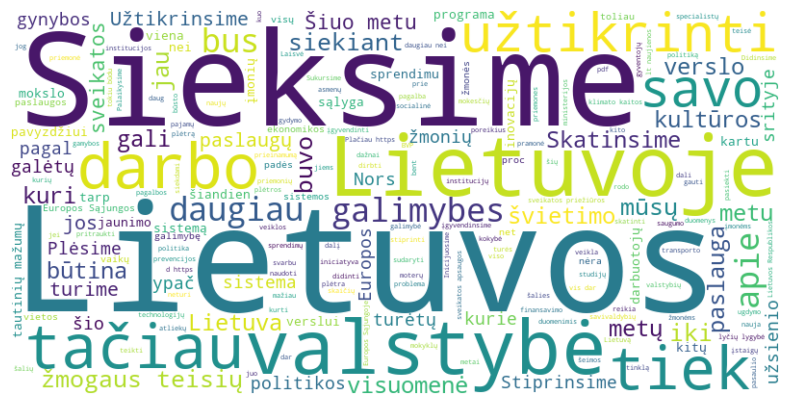

,Word,Count
1,lietuvos,291
2,sieksime,188
3,lietuvoje,187
4,valstybės,178
5,sveikatos,147
6,darbo,143
7,daugiau,130
8,paslaugų,124
9,europos,119
10,metu,115


In [125]:
LP_path = "laisves.txt"
LP_text = read_text_file(LP_path)
generate_word_cloud(LP_text, filler_words_lt)
LP_df = word_count_to_dataframe(LP_text, filler_words_lt)
LP_df.head(10)

#### Lietuvos Valstiečių ir Žaliųjų Sąjunga


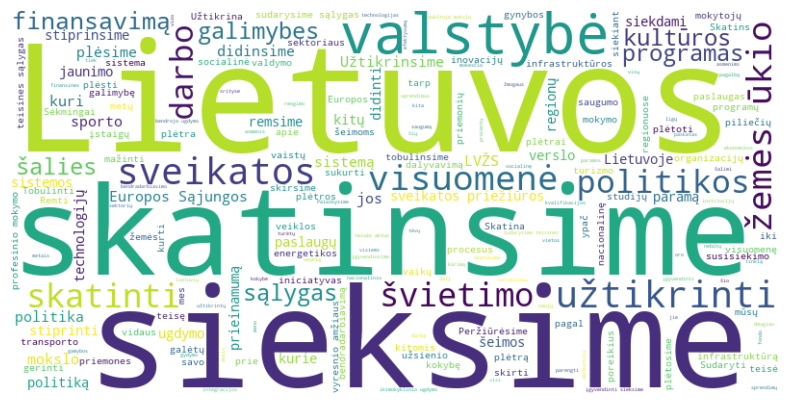

,Word,Count
1,lietuvos,91
2,sieksime,86
3,sveikatos,78
4,sąlygas,64
5,skatinsime,59
6,žemės,57
7,valstybės,56
8,darbo,51
9,užtikrinti,46
10,ūkio,46


In [126]:
LVZS_path = "lvzs.txt"
LVZS_text = read_text_file(LVZS_path)
generate_word_cloud(LVZS_text, filler_words_lt)
LVZS_df = word_count_to_dataframe(LVZS_text, filler_words_lt)
LVZS_df.head(10)

#### Merging DataFrames


In [127]:
# Convert 'Word' column to string for each party DataFrame
NM_df['Word'] = NM_df['Word'].astype(str)
TS_df['Word'] = TS_df['Word'].astype(str)
LSDP_df['Word'] = LSDP_df['Word'].astype(str)
VARDAN_df['Word'] = VARDAN_df['Word'].astype(str)
LIB_df['Word'] = LIB_df['Word'].astype(str)
LP_df['Word'] = LP_df['Word'].astype(str)
LVZS_df['Word'] = LVZS_df['Word'].astype(str)

# First, rename the 'count' column in each DataFrame to reflect the party name for easy identification
NM_df = NM_df.rename(columns={'Count': 'Nemuno Ausra'})
TS_df = TS_df.rename(columns={'Count': 'TS-LKD'})
LSDP_df = LSDP_df.rename(columns={'Count': 'LSDP'})
VARDAN_df = VARDAN_df.rename(columns={'Count': 'Vardan Lietuvos'})
LIB_df = LIB_df.rename(columns={'Count': 'Liberalų Sąjūdis'})
LP_df = LP_df.rename(columns={'Count': 'Laisvės partija'})
LVZS_df = LVZS_df.rename(columns={'Count': 'Lietuvos Valstiečių ir Žaliųjų Sąjunga'})

# Merge all DataFrames on the 'word' column using an outer join to retain all words
df_merged = NM_df.merge(TS_df, on='Word', how='outer')\
                 .merge(LSDP_df, on='Word', how='outer')\
                 .merge(VARDAN_df, on='Word', how='outer')\
                 .merge(LIB_df, on='Word', how='outer')\
                 .merge(LP_df, on='Word', how='outer')\
                 .merge(LVZS_df, on='Word', how='outer')

# Fill missing values (NaN) with 0 since a word may not appear in all party programmes
df_merged = df_merged.fillna(0)

# Add a new column 'total_count' which sums the counts across all parties
df_merged['Total_count'] = df_merged.iloc[:, 1:].sum(axis=1)

# Sort by 'total_count' in descending order
df_merged = df_merged.sort_values(by='Total_count', ascending=False)

# Reset index to start from 1
df_merged = df_merged.reset_index(drop=True)
df_merged.index = df_merged.index + 1

# Reorder columns to have 'word' and 'total_count' first, followed by each party's count
df_merged = df_merged[['Word', 'Total_count', 'Nemuno Ausra', 'TS-LKD', 'LSDP', 'Vardan Lietuvos', 
                       'Liberalų Sąjūdis', 'Laisvės partija', 'Lietuvos Valstiečių ir Žaliųjų Sąjunga']]

# Convert all columns except 'Word' to integers
df_merged.iloc[:, 1:] = df_merged.iloc[:, 1:].astype(int)

In [128]:
df_merged.head(10)

,Word,Total_count,Nemuno Ausra,TS-LKD,LSDP,Vardan Lietuvos,Liberalų Sąjūdis,Laisvės partija,Lietuvos Valstiečių ir Žaliųjų Sąjunga
1,lietuvos,819.0,7.0,90.0,101.0,54.0,185.0,291.0,91.0
2,valstybės,469.0,2.0,41.0,66.0,37.0,89.0,178.0,56.0
3,sveikatos,442.0,5.0,31.0,54.0,33.0,94.0,147.0,78.0
4,darbo,428.0,0.0,36.0,68.0,37.0,93.0,143.0,51.0
5,sieksime,423.0,2.0,16.0,59.0,27.0,45.0,188.0,86.0
6,lietuvoje,337.0,2.0,18.0,31.0,22.0,50.0,187.0,27.0
7,paslaugų,312.0,1.0,18.0,52.0,21.0,73.0,124.0,23.0
8,skatinsime,297.0,0.0,18.0,59.0,31.0,65.0,65.0,59.0
9,užtikrinsime,273.0,4.0,19.0,61.0,55.0,52.0,56.0,26.0
10,kultūros,266.0,3.0,9.0,43.0,21.0,76.0,83.0,31.0


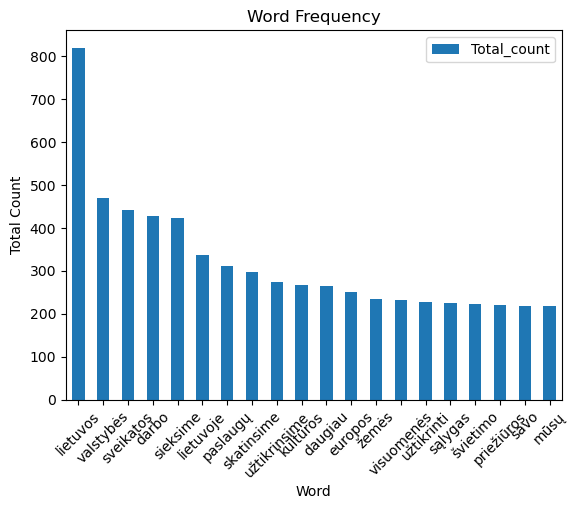

In [129]:
# Create a bar plot
df_merged.iloc[:20, :].plot(x='Word', y='Total_count', kind='bar')

# Customize the plot
plt.title('Word Frequency')
plt.xlabel('Word')
plt.ylabel('Total Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [130]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21337 entries, 1 to 21337
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Word                                    21337 non-null  object 
 1   Total_count                             21337 non-null  float64
 2   Nemuno Ausra                            21337 non-null  float64
 3   TS-LKD                                  21337 non-null  float64
 4   LSDP                                    21337 non-null  float64
 5   Vardan Lietuvos                         21337 non-null  float64
 6   Liberalų Sąjūdis                        21337 non-null  float64
 7   Laisvės partija                         21337 non-null  float64
 8   Lietuvos Valstiečių ir Žaliųjų Sąjunga  21337 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.5+ MB


In [131]:
# Set the index to 'Word' for better readability
df_merged.set_index('Word', inplace=True)

In [132]:
# Drop 'Total_count' column since we're focusing on proportions
df_merged.drop(columns=['Total_count'], inplace=True)

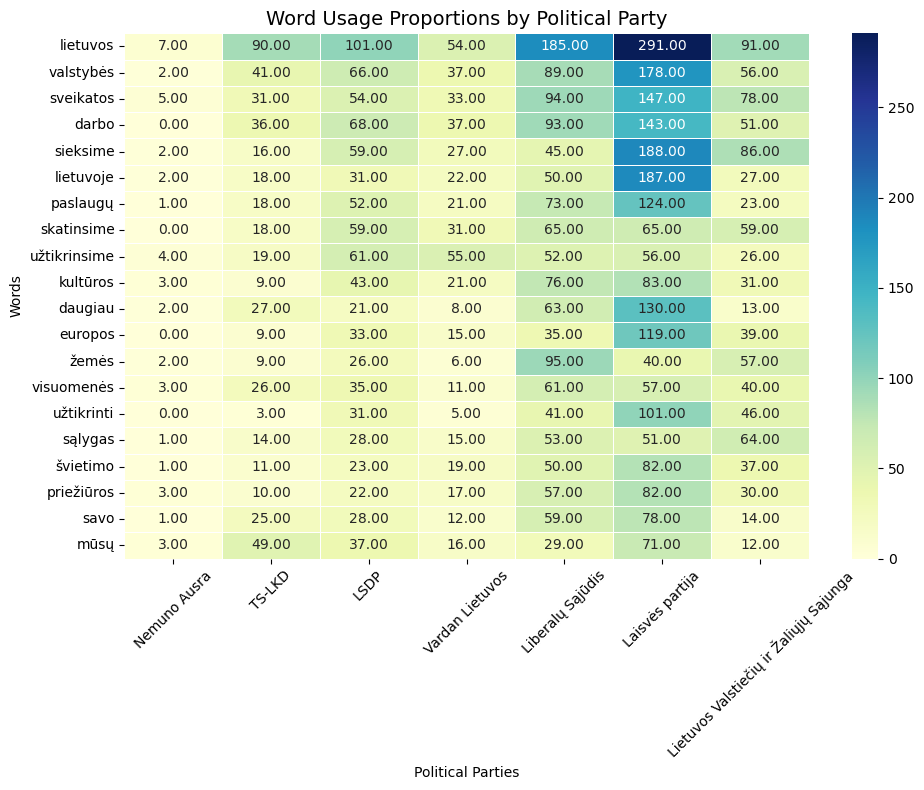

In [133]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_merged.iloc[:20, :], annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")

# Add titles and labels
plt.title('Word Usage Proportions by Political Party', fontsize=14)
plt.xlabel('Political Parties')
plt.ylabel('Words')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [134]:
# Calculate total words for each party
total_words_per_party = {
    'Nemuno Ausra': df_merged['Nemuno Ausra'].sum(),
    'TS-LKD': df_merged['TS-LKD'].sum(),
    'LSDP': df_merged['LSDP'].sum(),
    'Vardan Lietuvos': df_merged['Vardan Lietuvos'].sum(),
    'Liberalų Sąjūdis': df_merged['Liberalų Sąjūdis'].sum(),
    'Laisvės partija': df_merged['Laisvės partija'].sum(),
    'Lietuvos Valstiečių ir Žaliųjų Sąjunga': df_merged['Lietuvos Valstiečių ir Žaliųjų Sąjunga'].sum()
}

# Normalize each party's word counts by the total number of words in their program
df_proportions = df_merged.copy()
df_proportions['Nemuno Ausra'] = df_proportions['Nemuno Ausra'] / total_words_per_party['Nemuno Ausra']
df_proportions['TS-LKD'] = df_proportions['TS-LKD'] / total_words_per_party['TS-LKD']
df_proportions['LSDP'] = df_proportions['LSDP'] / total_words_per_party['LSDP']
df_proportions['Vardan Lietuvos'] = df_proportions['Vardan Lietuvos'] / total_words_per_party['Vardan Lietuvos']
df_proportions['Liberalų Sąjūdis'] = df_proportions['Liberalų Sąjūdis'] / total_words_per_party['Liberalų Sąjūdis']
df_proportions['Laisvės partija'] = df_proportions['Laisvės partija'] / total_words_per_party['Laisvės partija']
df_proportions['Lietuvos Valstiečių ir Žaliųjų Sąjunga'] = df_proportions['Lietuvos Valstiečių ir Žaliųjų Sąjunga'] / total_words_per_party['Lietuvos Valstiečių ir Žaliųjų Sąjunga']

In [135]:
df_proportions.head(10)

,Nemuno Ausra,TS-LKD,LSDP,Vardan Lietuvos,Liberalų Sąjūdis,Laisvės partija,Lietuvos Valstiečių ir Žaliųjų Sąjunga
Word,,,,,,,
lietuvos,0.011804,0.012126,0.007442,0.008207,0.008309,0.007090,0.008582
valstybės,0.003373,0.005524,0.004863,0.005623,0.003997,0.004337,0.005281
sveikatos,0.008432,0.004177,0.003979,0.005015,0.004222,0.003582,0.007356
darbo,0.000000,0.004850,0.005010,0.005623,0.004177,0.003484,0.004810
sieksime,0.003373,0.002156,0.004347,0.004103,0.002021,0.004580,0.008110
lietuvoje,0.003373,0.002425,0.002284,0.003343,0.002246,0.004556,0.002546
paslaugų,0.001686,0.002425,0.003831,0.003191,0.003279,0.003021,0.002169
skatinsime,0.000000,0.002425,0.004347,0.004711,0.002920,0.001584,0.005564
užtikrinsime,0.006745,0.002560,0.004495,0.008359,0.002336,0.001364,0.002452


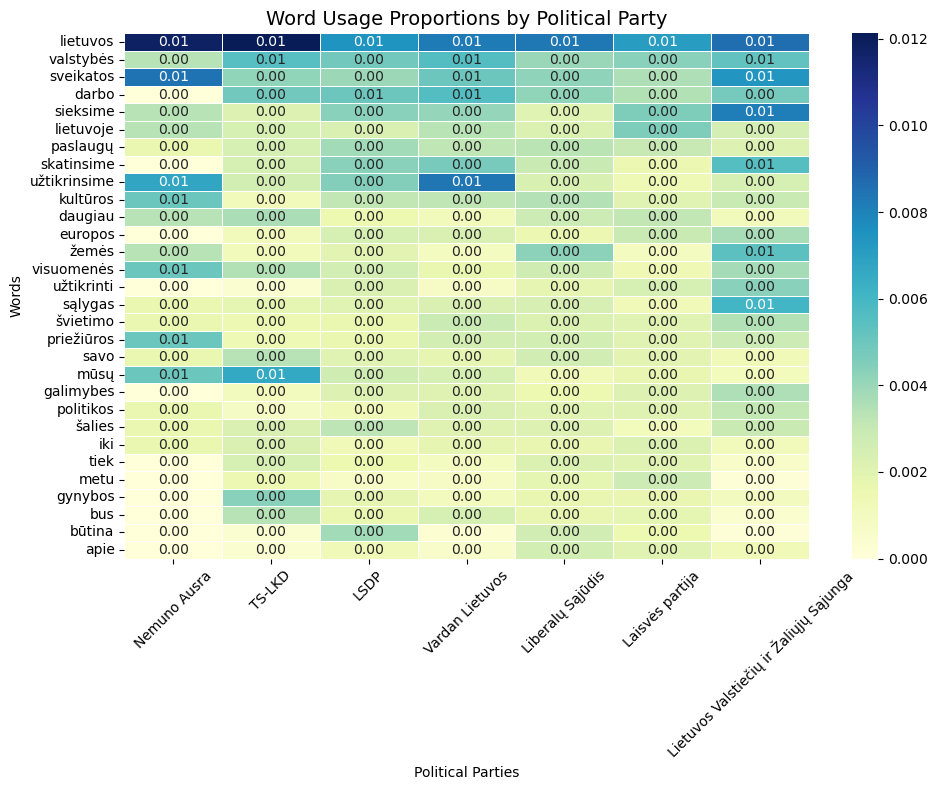

In [136]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_proportions.iloc[:30, :], annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")

# Add titles and labels
plt.title('Word Usage Proportions by Political Party', fontsize=14)
plt.xlabel('Political Parties')
plt.ylabel('Words')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Length of sentences in programmes


In [137]:
def create_bar_plot(df, x_column, y_column, title, x_label, y_label):
    # Create a bar plot
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    bars = plt.bar(df[x_column], df[y_column])

    # Add labels on top of each bar
    plt.bar_label(bars, labels=df[y_column], fontsize=12)

    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Show the plot
    plt.show()

In [147]:
def average_sentence_length(text):
  """Calculates the average sentence length in words.

  Args:
    text: The input text string.

  Returns:
    The average sentence length in words.
  """

  # Split the text into sentences using regular expression
  sentences = re.split(r'[.?!;]', text)

  # Remove empty sentences and calculate the total word count
  total_words = 0
  for sentence in sentences:
    words = sentence.split()
    total_words += len(words)

  # Calculate the average sentence length
  average_length = total_words / len(sentences)

  return average_length

##### Names of dataframes
NM_df
TS_df
LSDP_df
VARDAN_df
LIB_df
LP_df
LVZS_df

In [148]:
party_names = ['Nemuno Ausra', 'TS-LKD', 'LSDP', 'Vardan Lietuvos', 'Liberalų Sąjūdis', 'Laisvės partija', 'Lietuvos Valstiečių ir Žaliųjų Sąjunga']
list_of_dataframes = [NM_text, TS_text, LSDP_text, VARDAN_text, LIB_text, LP_text, LVZS_text]
df_avg_length = pd.DataFrame({'Party': party_names, 'Average Sentence Length': [average_sentence_length(name) for name in list_of_dataframes]})
df_avg_length['Average Sentence Length'] = round(df_avg_length['Average Sentence Length'], 1)
df_avg_length

,Party,Average Sentence Length
0,Nemuno Ausra,12.4
1,TS-LKD,13.0
2,LSDP,16.1
3,Vardan Lietuvos,16.1
4,Liberalų Sąjūdis,8.4
5,Laisvės partija,11.7
6,Lietuvos Valstiečių ir Žaliųjų Sąjunga,17.4


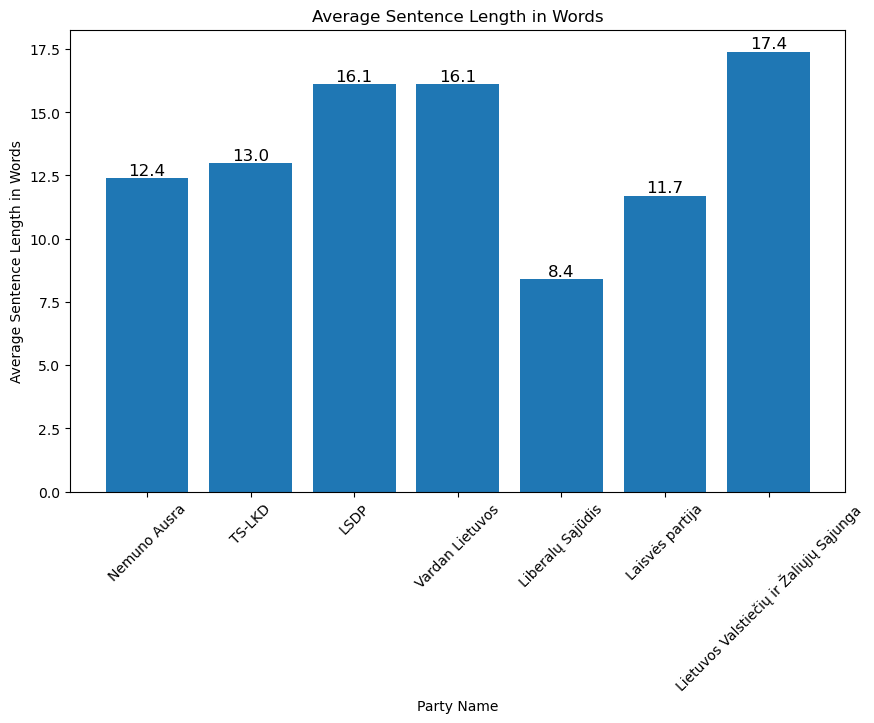

In [151]:
create_bar_plot(df_avg_length, 'Party', 'Average Sentence Length', 'Average Sentence Length in Words', 'Party Name', 'Average Sentence Length in Words')

In [149]:
def average_sentence_length_symbols(text):
  """Calculates the average sentence length in symbols.

  Args:
    text: The input text string.

  Returns:
    The average sentence length in symbols.
  """

  # Split the text into sentences using regular expression
  sentences = re.split(r'[.?!;]', text)

  # Remove empty sentences and calculate the total symbol count
  total_symbols = 0
  for sentence in sentences:
    total_symbols += len(sentence)

  # Calculate the average sentence length
  average_length = total_symbols / len(sentences)

  return average_length

In [150]:
party_names = ['Nemuno Ausra', 'TS-LKD', 'LSDP', 'Vardan Lietuvos', 'Liberalų Sąjūdis', 'Laisvės partija', 'Lietuvos Valstiečių ir Žaliųjų Sąjunga']
list_of_dataframes = [NM_text, TS_text, LSDP_text, VARDAN_text, LIB_text, LP_text, LVZS_text]
df_avg_length_symbols = pd.DataFrame({'Party': party_names, 'Average Sentence Length in Symbols': [average_sentence_length_symbols(name) for name in list_of_dataframes]})
df_avg_length_symbols['Average Sentence Length in Symbols'] = round(df_avg_length_symbols['Average Sentence Length in Symbols'], 1)
df_avg_length_symbols

,Party,Average Sentence Length in Symbols
0,Nemuno Ausra,100.1
1,TS-LKD,104.7
2,LSDP,135.2
3,Vardan Lietuvos,137.3
4,Liberalų Sąjūdis,68.3
5,Laisvės partija,95.3
6,Lietuvos Valstiečių ir Žaliųjų Sąjunga,143.9


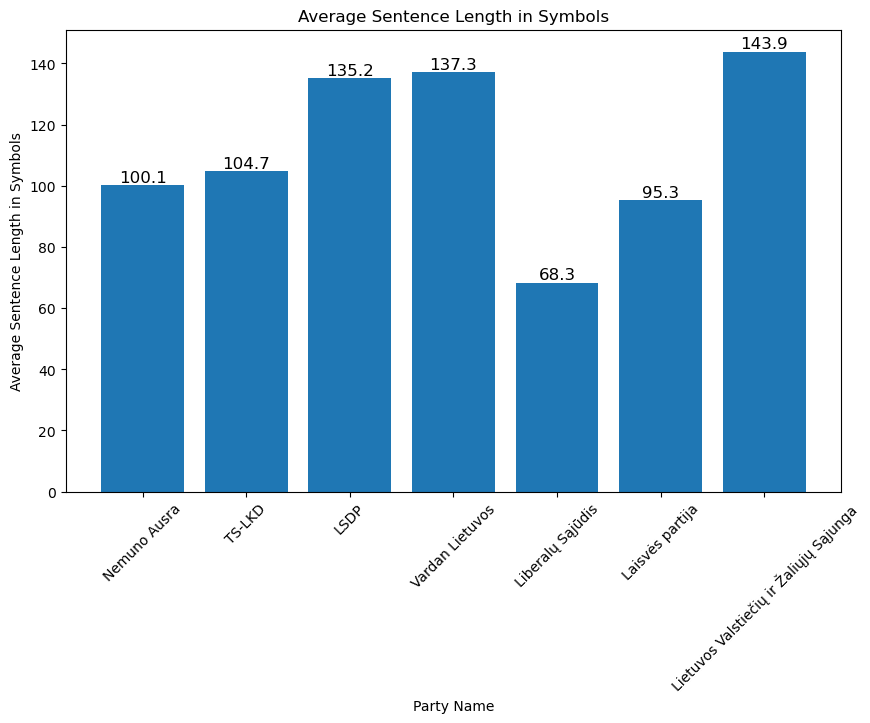

In [152]:
create_bar_plot(df_avg_length_symbols, 'Party', 'Average Sentence Length in Symbols', 'Average Sentence Length in Symbols', 'Party Name', 'Average Sentence Length in Symbols')

In [144]:
def length_of_programme(text):
    """Calculates the length of the programme in words.

    Args:
        text: The input text string.

    Returns:
        The total number of words in the text.
    """

    # Split the text into words using regular expression
    words = re.findall(r'\w+', text)

    # Count the total number of words
    total_words = len(words)

    return total_words

In [153]:
party_names = ['Nemuno Ausra', 'TS-LKD', 'LSDP', 'Vardan Lietuvos', 'Liberalų Sąjūdis', 'Laisvės partija', 'Lietuvos Valstiečių ir Žaliųjų Sąjunga']
list_of_dataframes = [NM_text, TS_text, LSDP_text, VARDAN_text, LIB_text, LP_text, LVZS_text]
df_length = pd.DataFrame({'Party': party_names, 'Length of Programme in Words': [length_of_programme(name) for name in list_of_dataframes]})
df_length['Length of Programme in Words'] = round(df_length['Length of Programme in Words'], 1)
df_length

,Party,Length of Programme in Words
0,Nemuno Ausra,702
1,TS-LKD,9016
2,LSDP,16185
3,Vardan Lietuvos,7695
4,Liberalų Sąjūdis,26514
5,Laisvės partija,51373
6,Lietuvos Valstiečių ir Žaliųjų Sąjunga,12430


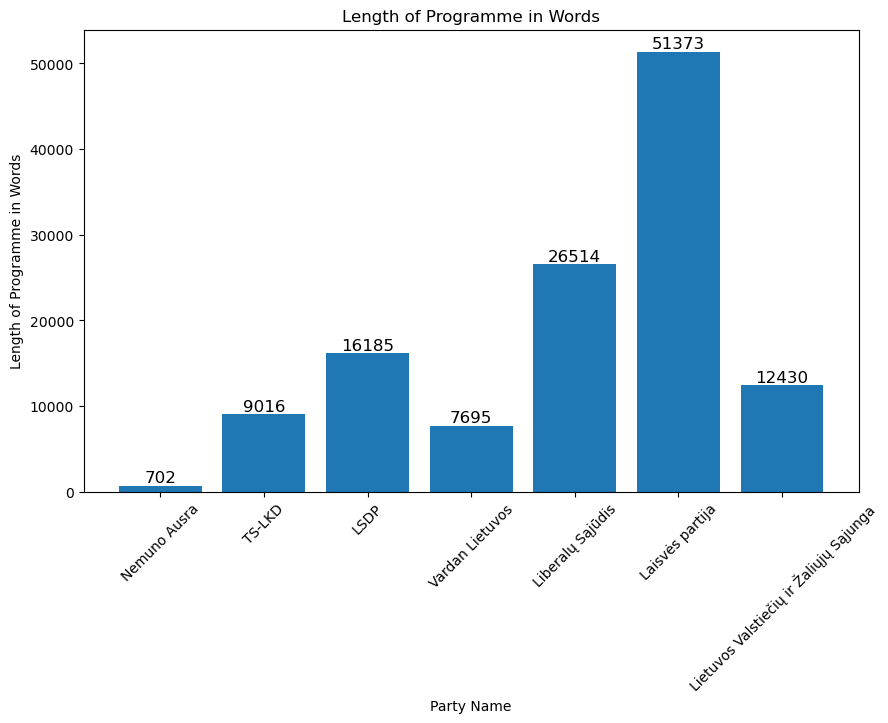

In [154]:
create_bar_plot(df_length, 'Party', 'Length of Programme in Words', 'Length of Programme in Words', 'Party Name', 'Length of Programme in Words')

### Insights

1. Laisves Partija wrote by far the most words in their programme.
2. Nemuno Ausra used the fewest words in their programme.
3. Most parties used the same words most frequently including 'Lietuvos', 'Valstybės', 'Sveikatos', 'darbo', 'sieksime'.
4. The longest average sentences were written by LSDP, Vardan Lietuvos and Lietuvos Valstiečių ir Žaliųjų Sąjunga (parties which probably will go to the coalition).
5. Shortest average sentences were written by Liberalų Sąjūdis and Laisves Partija (parties which are close to each other in political views).